In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Preparing The Dataset 

In [51]:
# TODO: Load the dataset from the csv file using pandas. The file is called 'data.csv'
data = pd.read_csv('data.csv')
# TODO: Print the shape of the data
print("# of rows and columns:", data.shape)
# TODO: Print the first 5 rows of the data
print(data.head())

# of rows and columns: (2000, 3)
         x1        x2    y
0  1.388103  0.541000  1.0
1  0.257498  1.034341  0.0
2  0.481232 -0.175209  1.0
3 -0.925897 -0.221878  0.0
4  0.783837 -0.486287  1.0


### Visualizing the dataset


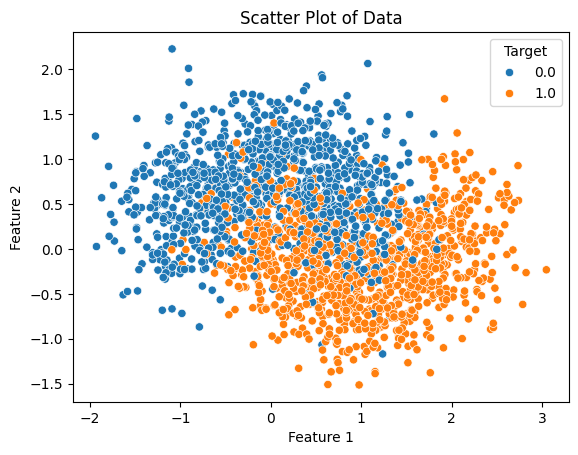

In [52]:
# TODO: Visualize the data using a scatter plot. Be sure to include a legend
sns.scatterplot(x='x1', y='x2', hue='y', data=data)
plt.title('Scatter Plot of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Target')
plt.show()

### Splitting the dataset into train and test sets


In [53]:
# TODO: split the dataset into train and test sets without using sklearn
# use a 80/20 split
shuffled_data = data.sample(frac=1, random_state=42)
splitt = int(2000*0.8)
train =  shuffled_data[:splitt]
test = shuffled_data[splitt:]

# TODO: print the number of rows in the train and test sets
print("Number of rows in training set :", len(train))
print("Number of rows in test set :", len(test))

Number of rows in training set : 1600
Number of rows in test set : 400


In [54]:
# TODO: Separate into X and y
X_train = train[['x1', 'x2']]
y_train = train['y']
X_test = test[['x1', 'x2']]
y_test = test['y']

print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

            x1        x2
1860  1.363081 -0.757762
353   1.091482 -0.362386
1333 -1.021148  1.034913
905   1.437729 -0.350308
1289  0.635814 -0.166356
            x1        x2
283   0.378494 -0.019381
797  -0.052156 -0.671275
1626  0.474776 -0.444192
225   2.584561  0.549337
26    0.234733  0.386614
1860    1.0
353     1.0
1333    0.0
905     1.0
1289    0.0
Name: y, dtype: float64
283     1.0
797     1.0
1626    1.0
225     1.0
26      1.0
Name: y, dtype: float64


# Classification Models From Scratch

In [55]:
# Do not modify the code below

def plot_decision_boundary(model, X, y):
    '''
    Function to plot the decision boundary of a classification model.
    Parameters:
        model: the classification model
        X: the input features
        y: the target labels
    '''

    # Set min and max values and give it some padding
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.05

    # Generate a grid of points with distance h between them
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

    # Predict the function value for the whole grid
    Z = np.array(model.predict(np.c_[x1.ravel(), x2.ravel()]))

    Z = Z.reshape(x1.shape)

    # Plot the contour and training examples
    plt.contourf(x1, x2, Z, cmap=plt.cm.Set1, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='.', s=20, linewidth=1, alpha=0.2, cmap=plt.cm.Set1)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Dataset")
    plt.show()

## K-Nearest Neighbors 
KNNs are a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation. In this algorithm, an object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

### Distance Function
We will use the Euclidean distance function to find the nearest neighbors.

In [56]:
def euclidean_distance(x1, x2):
    # TODO: Implement the euclidean distance function
    return np.sqrt(np.sum((x1 - x2)**2))

### KNN Classifier


In [57]:
# TODO: Implement the KNN classifier from scratch
# NOTE: You are allowed to alter method signatures and create as many helper functions as needed 
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        # This method should store the training data and labels
        self.X_train = X_train
        self.y_train = y_train
        
    def sort_by_distance(item):
        return item['dist']
    
    def predict(self, X_test):
        # This method should return a list of predictions for the test data
        model_preds = []
        for test_pt in X_test:
            distances = []
            for i in range(len(self.X_train)):
                distance_data = {
                    'X_train': self.X_train[i],
                    'y_train': self.y_train[i],
                    'dist': euclidean_distance(test_pt, self.X_train[i])
                }
                distances.append(distance_data)
            sorted_distances = sorted(distances, key=lambda x: x['dist'], reverse=False)

            preds = sorted_distances[:self.k]
            pred_labels = [entry['y_train'] for entry in preds]
            class_counts = Counter(pred_labels)
            majority_class = class_counts.most_common(1)[0][0]
            model_preds.append(int(majority_class))
        return model_preds
            
                
            

### Evaluation


In [58]:
# TODO: Create a KNN object and train it using the training data
knn = KNN(k=3)
knn.fit(X_train.values, y_train.values)
# TODO: Make predictions on the test data
y_pred = knn.predict(X_test.values)
print(y_pred)
# TODO: Evaluate the model using accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 

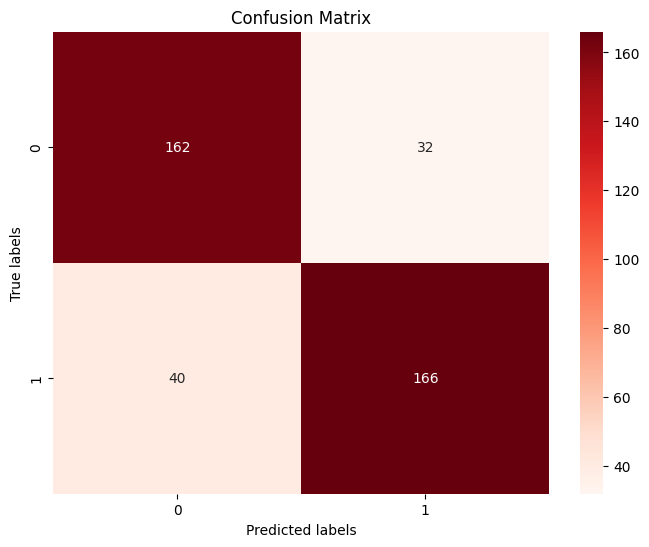

In [59]:
# TODO: Create a confusion matrix and plot it using a heatmap. 

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Plotting Decision Boundary
Since our data is 2D, we can also plot the decision boundary. The decision boundary is the region in the input space where the output label of the classifier changes. 

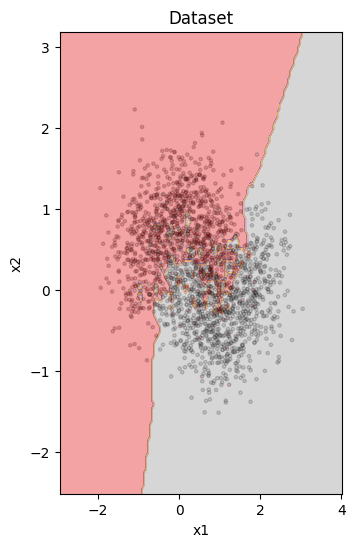

/var/folders/67/lckbffnn3bz9db3szq032rdr0000gn/T/ipykernel_78586/1236179595.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


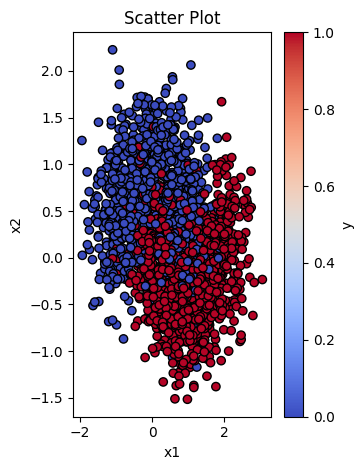

In [60]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(knn, data[['x1', 'x2']].values, data['y'].values)
plt.title('Decision Boundary')

plt.subplot(1, 2, 2)
plt.scatter(data['x1'], data['x2'], c=data['y'], cmap='coolwarm', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.colorbar(label='y')
plt.tight_layout()

plt.show()

After seeing how our initial model performed with a default value of `k` , we will now explore different `k` values. This step will help us find the best `k` setting to improve our model's ability to predict accurately



K =  1


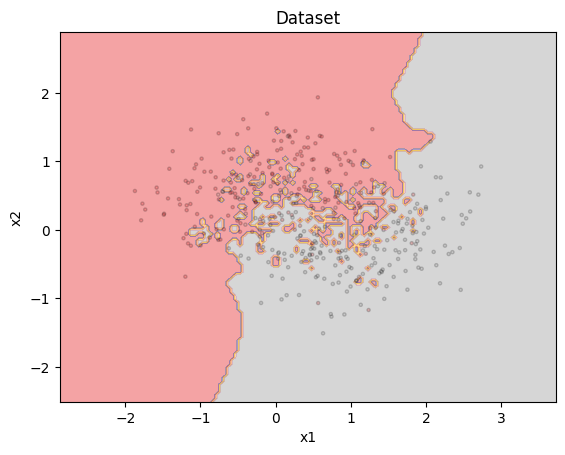

K =  2


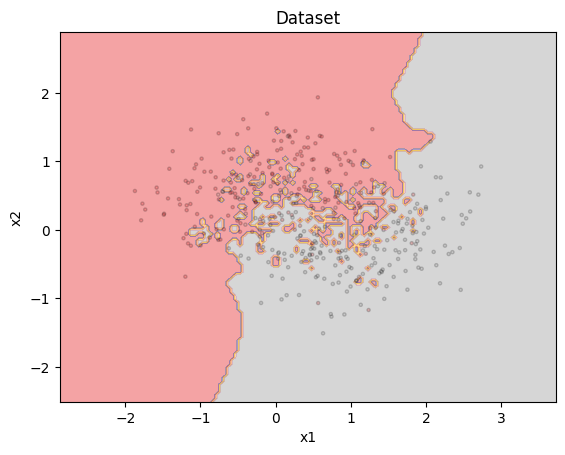

K =  3


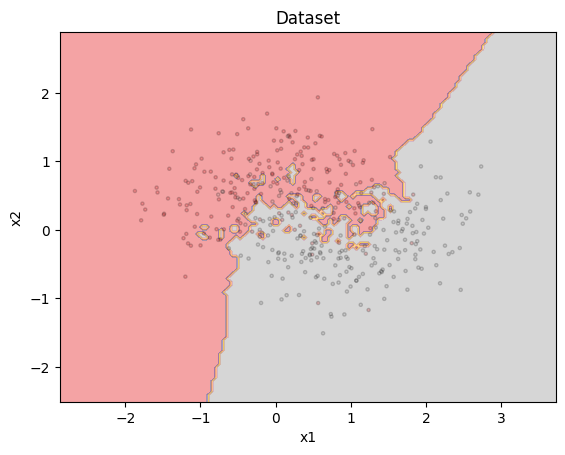

K =  4


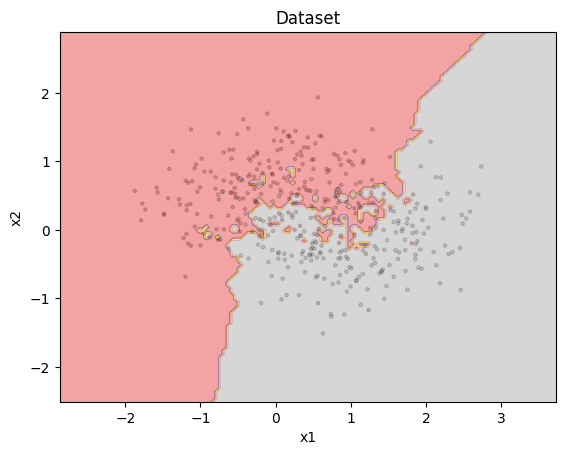

K =  5


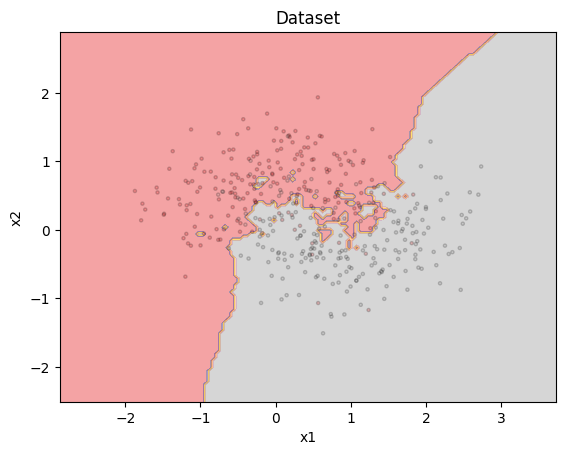

K =  6


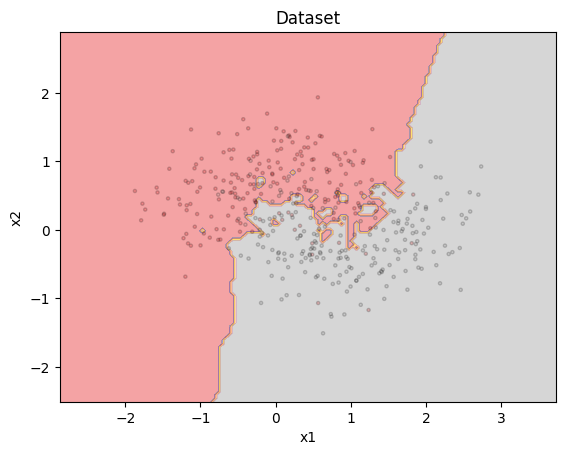

K =  7


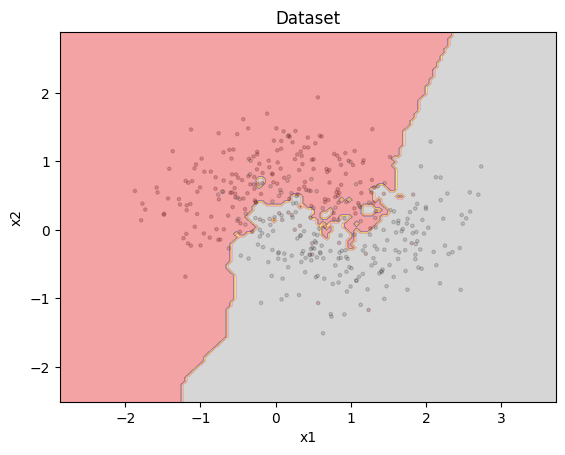

K =  8


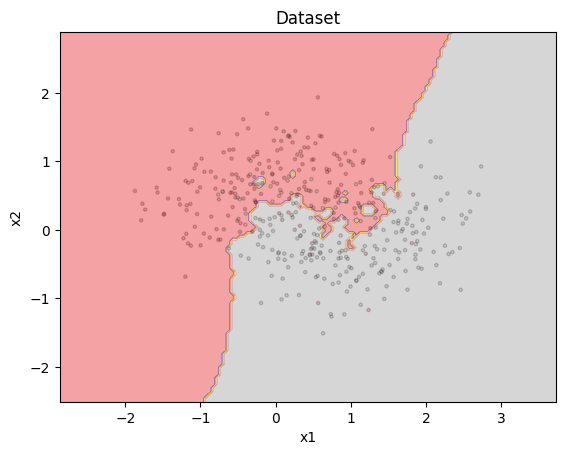

K =  9


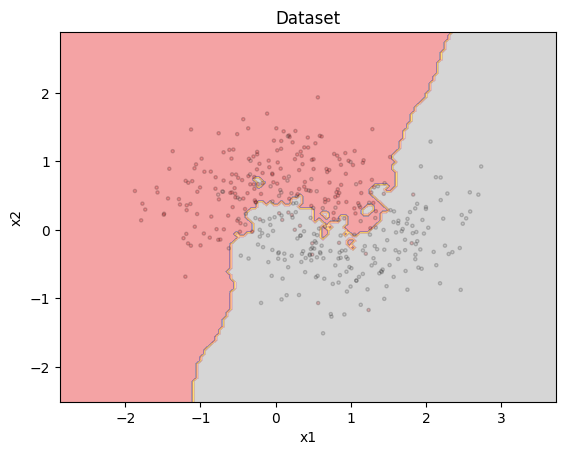

K =  10


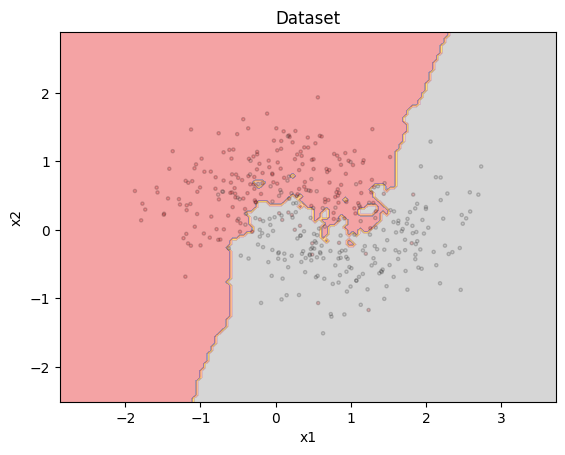

In [61]:
# TODO: Plot the decision boundary along with the scatter plot of the test dataset for K=1 to K=10
import matplotlib.pyplot as plt

# Initialize lists to store accuracies and KNN classifiers
accuracies = []
k_values = range(1, 11)
knn_classifiers = []

# Iterate over different values of k
for k in k_values:
    knn_classifier = KNN(k=k)
    
    knn_classifier.fit(X_train.values, y_train.values)
    
    knn_y_pred = knn_classifier.predict(X_test.values)
    
    accuracy = accuracy_score(y_test.values, knn_y_pred)
    accuracies.append(accuracy)
    
    print("K = ", k)
    plot_decision_boundary(knn_classifier, X_test.values, y_test.values)
    
    knn_classifiers.append(knn_classifier)




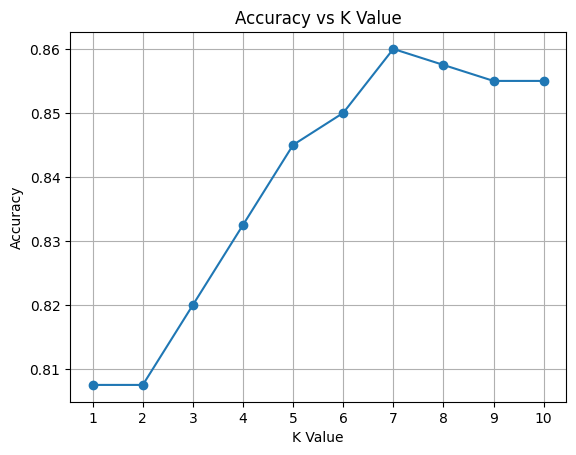

In [62]:
# Plot the accuracies for different k values
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


The optimal K value comes out to be K=7 as my model reaches max accuracy of 86%, this can be attributed to the spread of data points in my training set, All in all, K is a hyper-parameter after all and for this particular dataset, K = 7 works well, any value more than that causes a dip in the accuracy, any value less than K isnt optimal owing to the upwards trend or positive slope of the curve. Moreover, unsprisingly a value of K=1 and K=2leads to the lowest accuracy since it just basically returns the label of the training point closes to that test point, an extreme overreliance to the training data.


## Decision Tree 
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature. Each leaf node represents a class label. The paths from the root to leaf represent classification rules.

We will Use entropy as the measure of impurity and calculate the information gain to split the nodes.

In [63]:
import numpy as np

class DecisionTree:
    class Node:
        def __init__(self, feature_index=None, threshold=None, left_branch=None, right_branch=None, *, leaf_value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left_branch = left_branch
            self.right_branch = right_branch
            self.leaf_value = leaf_value

    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.root_node = None

    def fit(self, features, labels):
        self.root_node = self.construct_tree(features, labels)

    def construct_tree(self, features, labels, current_depth=0):
        # Check if the maximum depth has been reached or if all labels are the same
        if current_depth >= self.max_depth or len(np.unique(labels)) == 1:
            return self.Node(leaf_value=self.find_common_label(labels))

        # Choose the best feature and threshold for splitting
        optimal_feature, optimal_threshold = self.choose_split(features, labels)

        if optimal_feature is None:
            return self.Node(leaf_value=self.find_common_label(labels))

        return self.create_subtrees(features, labels, optimal_feature, optimal_threshold, current_depth)

    def choose_split(self, features, labels):
        # Selects the best feature and threshold to split the dataset
        optimal_feature, optimal_threshold = None, None
        max_info_gain = -1

        for feature_index in range(features.shape[1]):
            feature_values = features[:, feature_index]
            thresholds = np.unique(feature_values)
            for threshold in thresholds:
                info_gain = self.calculate_info_gain(labels, feature_values, threshold)
                if info_gain > max_info_gain:
                    max_info_gain = info_gain
                    optimal_feature = feature_index
                    optimal_threshold = threshold

        return optimal_feature, optimal_threshold

    def create_subtrees(self, features, labels, feature_index, threshold, current_depth):
        # Splits the dataset and creates left and right subtrees
        left_split, right_split = self.divide_data(features[:, feature_index], threshold)
        left_subtree = self.construct_tree(features[left_split, :], labels[left_split], current_depth + 1)
        right_subtree = self.construct_tree(features[right_split, :], labels[right_split], current_depth + 1)

        return self.Node(feature_index, threshold, left_subtree, right_subtree)


    def calculate_entropy(self, labels):
        labels_int = labels.astype(int)
        histogram = np.bincount(labels_int)
        probabilities = histogram / len(labels)
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    def find_common_label(self, labels):
        labels_int = labels.astype(int)
        return np.bincount(labels_int).argmax()

    def find_optimal_split(self, features, labels, feature_indices):
        max_info_gain = -1
        best_feature_index, best_threshold = None, None

        for feature_index in feature_indices:
            feature_values = features[:, feature_index]
            unique_thresholds = np.unique(feature_values)
            entropies = np.array([self.calculate_info_gain(labels, feature_values, threshold) for threshold in unique_thresholds])

            max_gain_index = np.argmax(entropies)
            if entropies[max_gain_index] > max_info_gain:
                max_info_gain = entropies[max_gain_index]
                best_feature_index = feature_index
                best_threshold = unique_thresholds[max_gain_index]

        return best_feature_index, best_threshold


    def calculate_info_gain(self, labels, feature_values, threshold):
        parent_entropy = self.calculate_entropy(labels)
        left_split, right_split = self.divide_data(feature_values, threshold)

        if len(left_split) == 0 or len(right_split) == 0:
            return 0

        left_entropy = self.calculate_entropy(labels[left_split])
        right_entropy = self.calculate_entropy(labels[right_split])

        left_ratio = len(left_split) / len(labels)
        right_ratio = len(right_split) / len(labels)

        post_split_entropy = left_ratio * left_entropy + right_ratio * right_entropy

        return parent_entropy - post_split_entropy

    def divide_data(self, feature_values, threshold):
        left_split = np.argwhere(feature_values <= threshold).flatten()
        right_split = np.argwhere(feature_values > threshold).flatten()
        return left_split, right_split

    def predict(self, features):
        return [self.make_prediction(feature, self.root_node) for feature in features]

    def make_prediction(self, feature, node):
        while node.leaf_value is None:
            if feature[node.feature_index] <= node.threshold:
                node = node.left_branch
            else:
                node = node.right_branch
        return node.leaf_value


### Evaluation


In [64]:
dt = DecisionTree(max_depth=5)
dt.fit(X_train.to_numpy(), y_train.to_numpy())

dt_y_pred = dt.predict(X_test.to_numpy())

accuracy = accuracy_score(y_test, dt_y_pred)
precision = precision_score(y_test, dt_y_pred, average='binary')
recall = recall_score(y_test, dt_y_pred, average='binary')
f1 = f1_score(y_test, dt_y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')




Accuracy: 0.86
Precision: 0.86
Recall: 0.87
F1 Score: 0.86


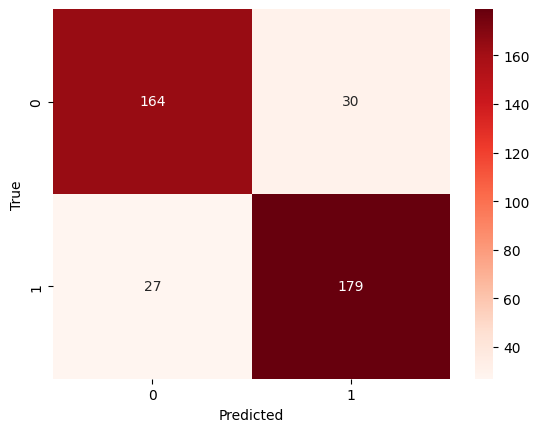

In [65]:
# TODO: Create a confusion matrix and plot it using a heatmap. 

cm = confusion_matrix(y_test, dt_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Plot Decision Boundary
Similar to the KNN classifier, we will plot the decision boundary for the decision tree classifier. We will also plot the decision boundary along with a scatter plot of the **Entire Data**. 

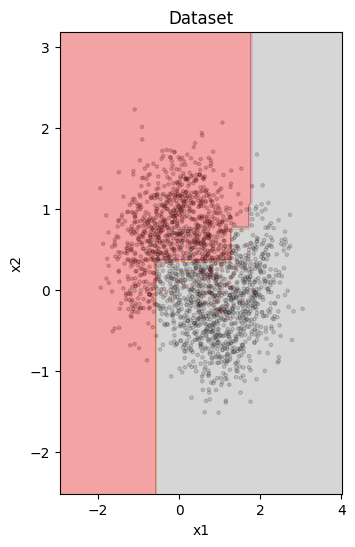

/var/folders/67/lckbffnn3bz9db3szq032rdr0000gn/T/ipykernel_78586/867281918.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


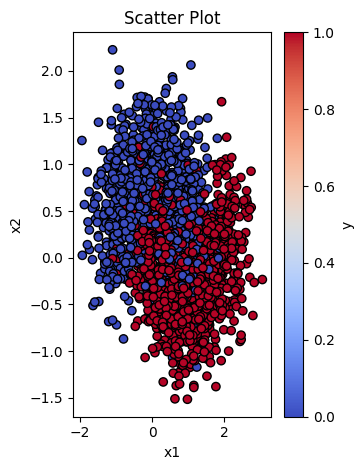

In [66]:
# TODO: Plot the decision boundary on the training set
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(dt, data[['x1', 'x2']].values, data['y'].values)
plt.title('Decision Boundary')

plt.subplot(1, 2, 2)
plt.scatter(data['x1'], data['x2'], c=data['y'], cmap='coolwarm', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.colorbar(label='y')
plt.tight_layout()

plt.show()

After seeing how our initial model performed with a default value of Max depth , we will now explore different Max depth values. This step will help us find the best Max depth setting to improve our model's ability to predict accurately

- We will use the `plot_decision_boundary` function given above to plot the decision boundaries and scatter plots for different values of `max_depth` from 1 to 15.
- We will gather the accuracy for each `max_depth` value on the test set and compare them while also showing these comparisons in a graph to easily see which `max_depth` value leads to the best predictions. This will help us choose the best k value for our model.

depth =  1


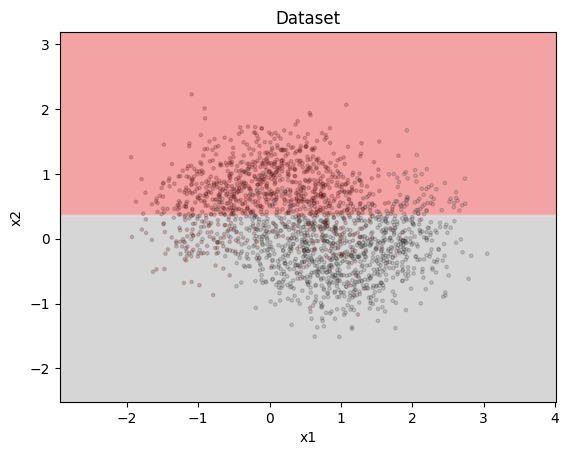

depth =  2


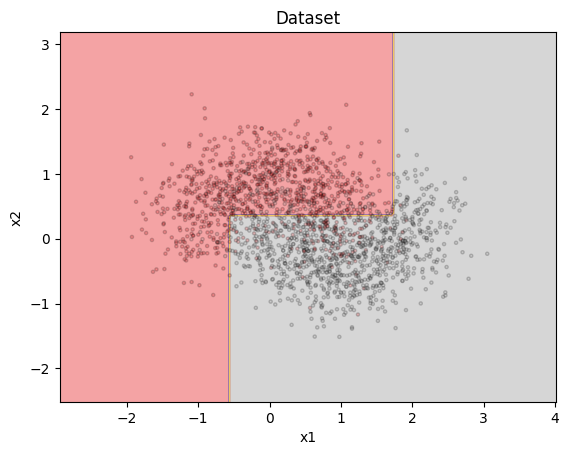

depth =  3


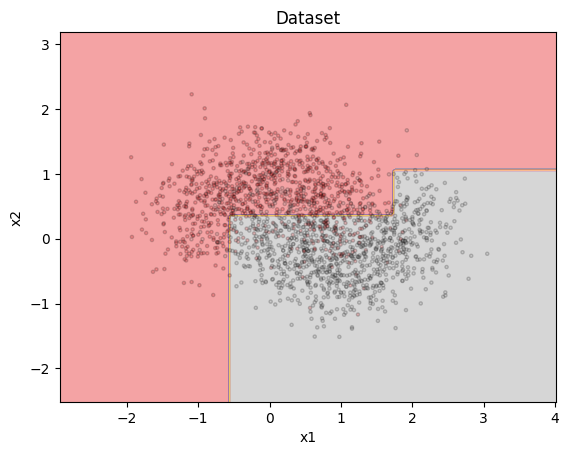

depth =  4


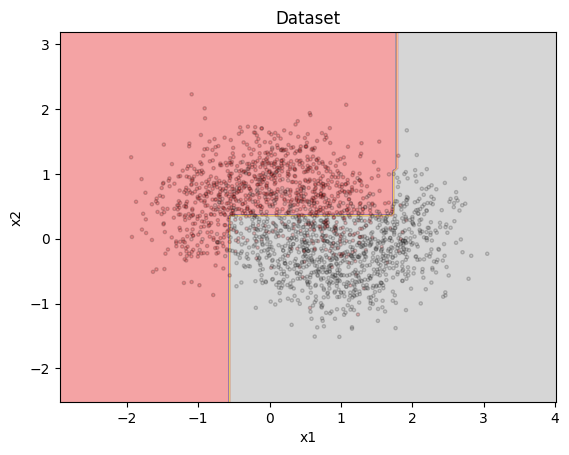

depth =  5


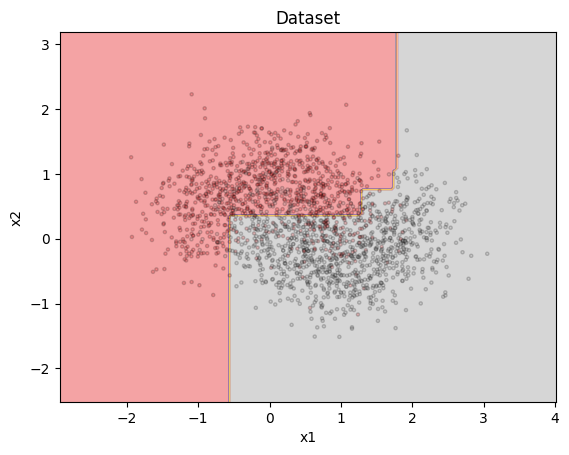

depth =  6


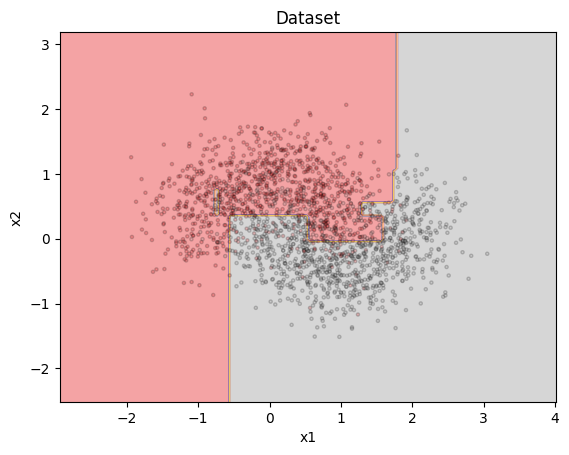

depth =  7


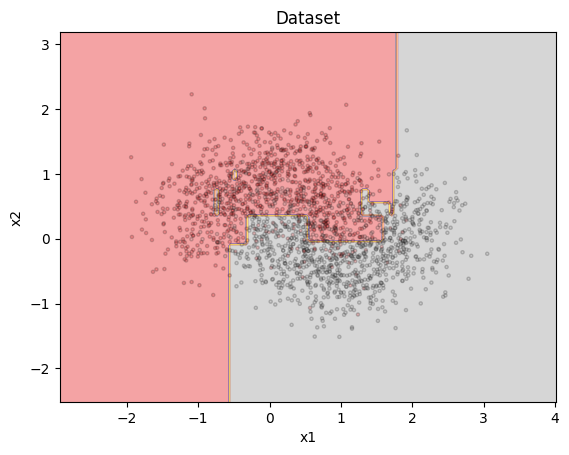

depth =  8


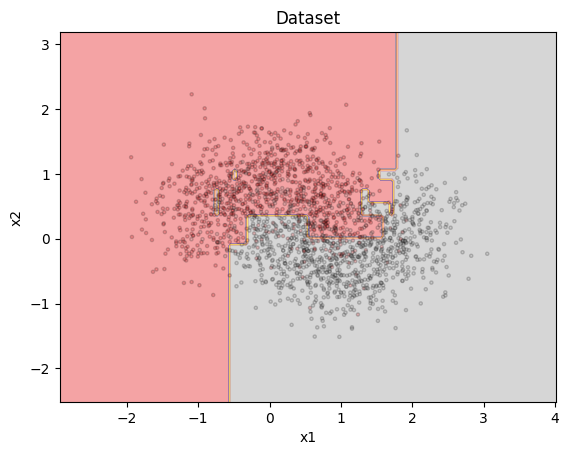

depth =  9


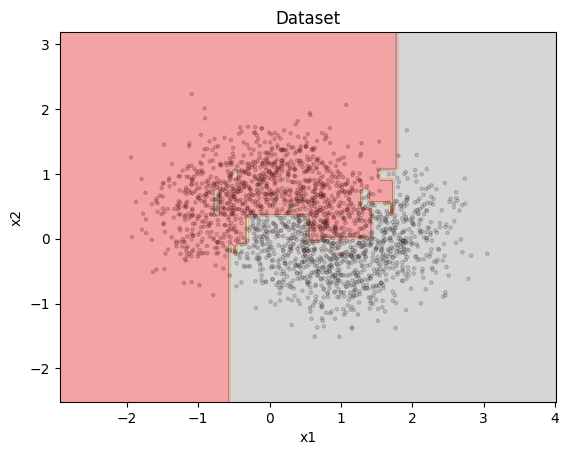

depth =  10


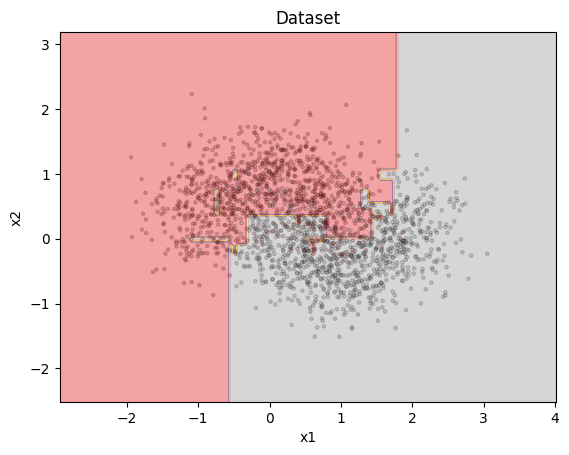

depth =  11


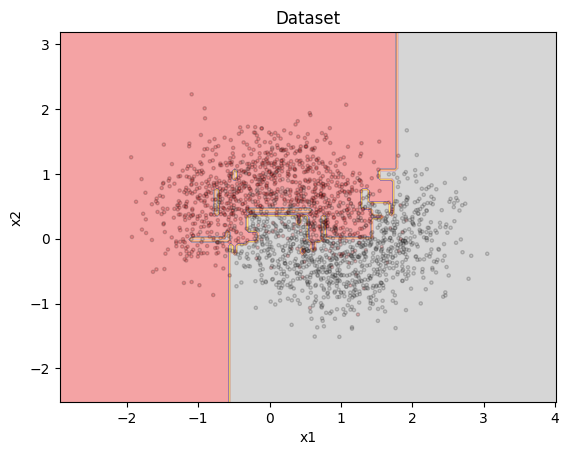

depth =  12


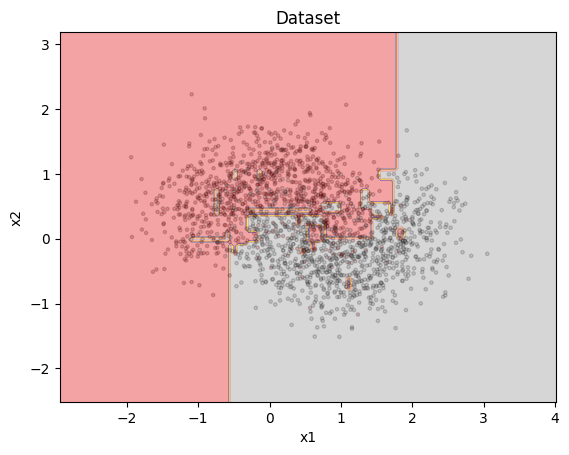

depth =  13


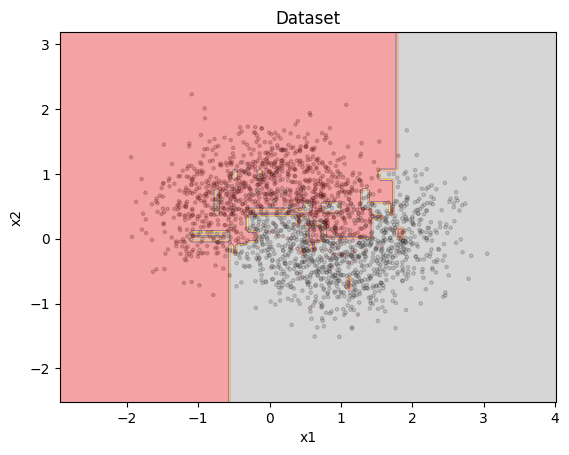

depth =  14


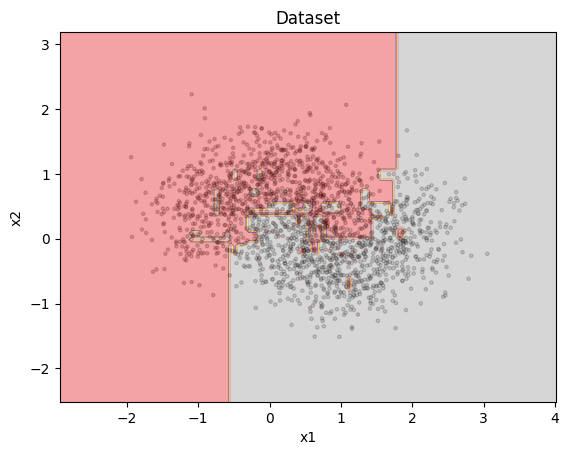

depth =  15


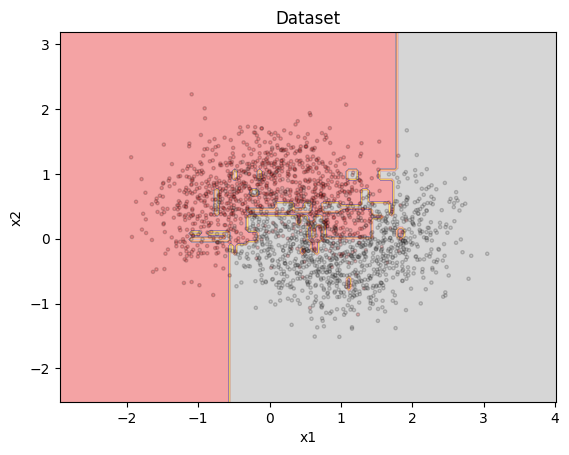

In [67]:
# TODO: Plot the decision boundary on the test set for different values of max_depth from 1 to 15
# TODO: Plot the decision boundary along with the scatter plot of the test dataset for K=1 to K=10

accuracies = []
depths = range(1, 16)
tree_classifiers = []

for depth in depths:
    dt = DecisionTree(max_depth=depth)
    dt.fit(X_train.to_numpy(), y_train.to_numpy())

    dt_y_pred = dt.predict(X_test.to_numpy())

    accuracy = accuracy_score(y_test, dt_y_pred)
    accuracies.append(accuracy)
    
    print("depth = ", depth)
    plot_decision_boundary(dt, data[['x1', 'x2']].values, data['y'].values)
    
    tree_classifiers.append(dt)




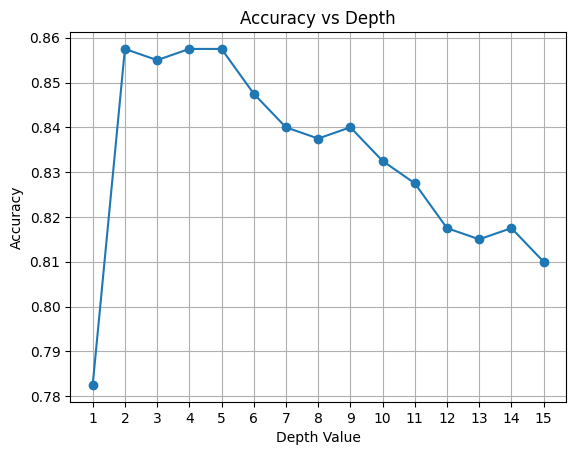

In [68]:
# TODO: Plot the accuracies of the model for different values of max_depth
# Plot the accuracies for different k values
plt.plot(depths, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs Depth')
plt.xlabel('Depth Value')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()


### Conclusions: 
Initially as the depth increases from 1 to around 3 or 4, there is a significant increase in accuracy. This suggests that the decision tree is initially benefiting from a greater capacity to capture the complexity of the data.
Peak Performance: The accuracy peaks at depth = 5 before starting to decline. This peak represents a depth where the decision tree is complex enough to model the data well without overfitting.
 After this peak, increasing the depth does not improve performance on the test set; in fact, it begins to harm the model's generalization as the accuracy decreases. This is indicative of overfitting, where the model is becoming too specialized in the training data and is not able to perform as well on unseen data.

# Classification Models Using Libraries
The above models were implemented from scratch. Now, we will use the libraries to implement the models and compare the results.

There are many libraries available for implementing classification models, such as sklearn, tensorflow, keras, etc. We will use the sklearn library to implement the models.

## SVMs using sklearn 

## Linear Kernel SVM


In [69]:
# TODO: Import the SVC class from sklearn

# TODO: Instantiate and train the SVM classifier. Use linear kernel. Use the link given above, and play with the parameters to get the best results
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')

svm_linear.fit(X_train, y_train)


SVC(kernel='linear')

#### Evaluation


In [70]:
# TODO: Make predictions on the test data
svm_linear_y_pred = svm_linear.predict(X_test)

# TODO: Evaluate the model using accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, svm_linear_y_pred)
precision = precision_score(y_test, svm_linear_y_pred, average='binary')
recall = recall_score(y_test, svm_linear_y_pred, average='binary')
f1 = f1_score(y_test, svm_linear_y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

svm_accuracies = []
svm_accuracies.append(accuracy)

Accuracy: 0.83
Precision: 0.87
Recall: 0.79
F1 Score: 0.83


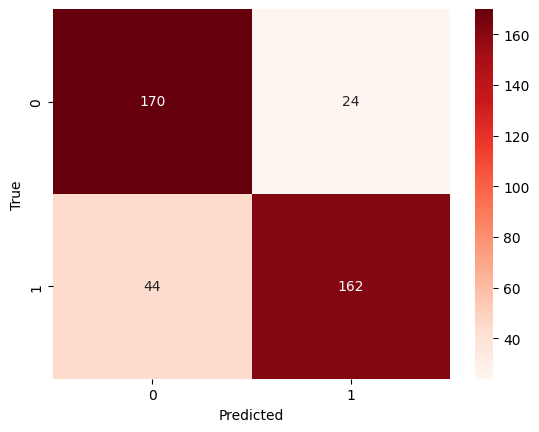

In [71]:
# TODO: Create a confusion matrix and plot it using a heatmap. 

cm = confusion_matrix(y_test, svm_linear_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Plot Decision Boundary


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


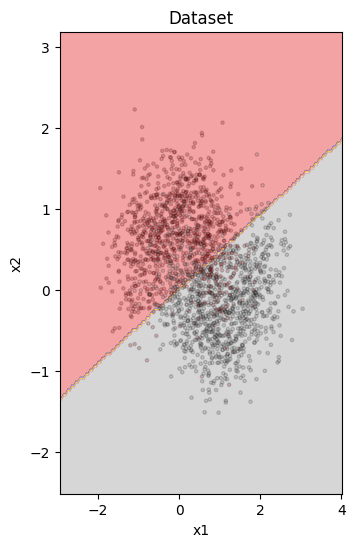

/var/folders/67/lckbffnn3bz9db3szq032rdr0000gn/T/ipykernel_78586/2975485919.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


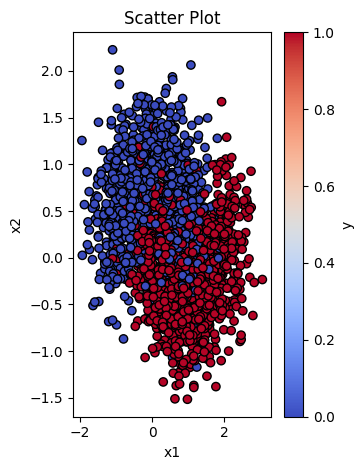

In [72]:
# TODO: Plot the decision boundary and the scatter plot of the dataset
# TODO: Plot the decision boundary on the training set
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(svm_linear, data[['x1', 'x2']].values, data['y'].values)
plt.title('Decision Boundary')

plt.subplot(1, 2, 2)
plt.scatter(data['x1'], data['x2'], c=data['y'], cmap='coolwarm', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.colorbar(label='y')
plt.tight_layout()

plt.show()

## Polynomial Kernel SVM


In [73]:


svm_poly = SVC(kernel='poly', degree=3, gamma='scale', coef0=1)
svm_poly.fit(X_train, y_train)


SVC(coef0=1, kernel='poly')

#### Evaluation


In [74]:
svm_polynomial_y_pred = svm_poly.predict(X_test)

accuracy = accuracy_score(y_test, svm_polynomial_y_pred)
precision = precision_score(y_test, svm_polynomial_y_pred, average='binary')
recall = recall_score(y_test, svm_polynomial_y_pred, average='binary')
f1 = f1_score(y_test, svm_polynomial_y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
svm_accuracies.append(accuracy)

Accuracy: 0.86
Precision: 0.90
Recall: 0.83
F1 Score: 0.86


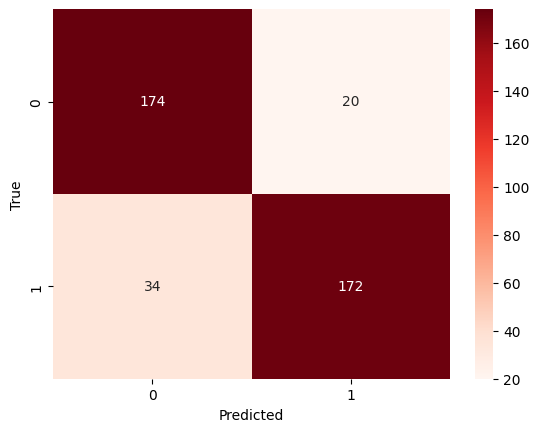

In [75]:


cm = confusion_matrix(y_test, svm_polynomial_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Plot Decision Boundary
Decision boundary for the polynomial kernel SVM classifier. 
We will also plot the entire data as a scatter plot. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


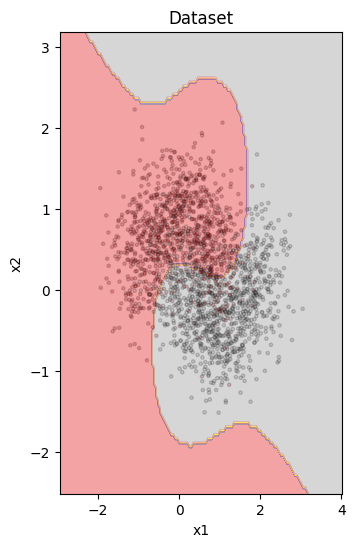

/var/folders/67/lckbffnn3bz9db3szq032rdr0000gn/T/ipykernel_78586/2669186541.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


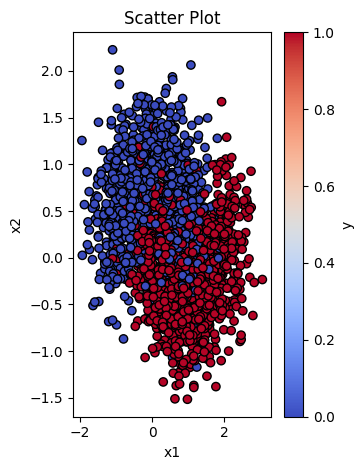

In [76]:
# TODO: Plot the decision boundary and the scatter plot of the dataset
# TODO: Plot the decision boundary and the scatter plot of the dataset
# TODO: Plot the decision boundary on the training set
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(svm_poly, data[['x1', 'x2']].values, data['y'].values)
plt.title('Decision Boundary')

plt.subplot(1, 2, 2)
plt.scatter(data['x1'], data['x2'], c=data['y'], cmap='coolwarm', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.colorbar(label='y')
plt.tight_layout()

plt.show()

## RBF Kernel SVM
We will build the SVM classifier using the RBF kernel. 

In [77]:
# TODO: Import the SVC class from sklearn

# TODO: Instantiate and train the SVM classifier. Use RBF kernel. Use the link given above, and play with the parameters to get the best results
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')  
svm_rbf.fit(X_train, y_train)  


SVC()

#### Evaluation


In [78]:
# TODO: Make predictions on the test data
svm_rbf_y_pred = svm_rbf.predict(X_test)  # Replace X_test with your test data

# TODO: Evaluate the model using accuracy, precision, recall, and f1 score
accuracy = accuracy_score(y_test, svm_rbf_y_pred)
precision = precision_score(y_test, svm_rbf_y_pred, average='binary')
recall = recall_score(y_test, svm_rbf_y_pred, average='binary')
f1 = f1_score(y_test, svm_rbf_y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
svm_accuracies.append(accuracy)

Accuracy: 0.86
Precision: 0.90
Recall: 0.83
F1 Score: 0.86


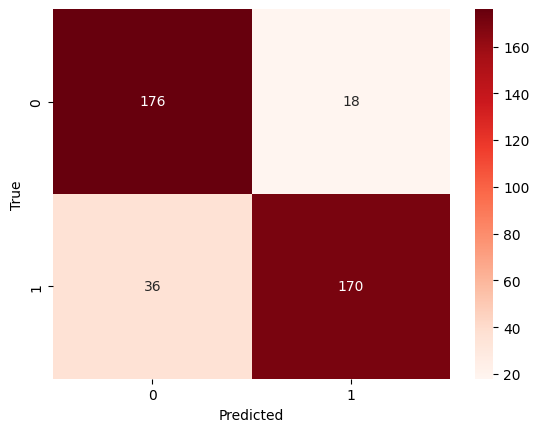

In [79]:
# TODO: Create a confusion matrix and plot it using a heatmap. 

cm = confusion_matrix(y_test, svm_rbf_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Plot Decision Boundary


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


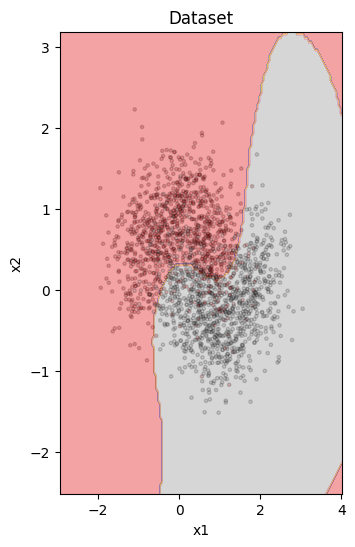

/var/folders/67/lckbffnn3bz9db3szq032rdr0000gn/T/ipykernel_78586/4277378236.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


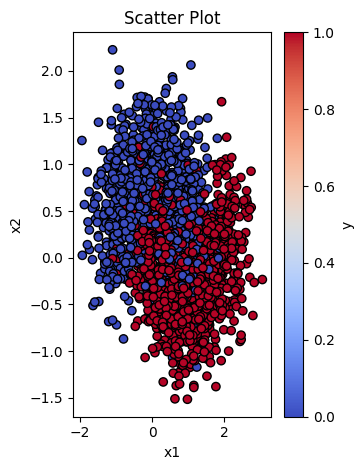

In [82]:
# TODO: Plot the decision boundary and the scatter plot of the dataset
# TODO: Plot the decision boundary and the scatter plot of the dataset
# TODO: Plot the decision boundary on the training set
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(svm_rbf, data[['x1', 'x2']].values, data['y'].values)
plt.title('Decision Boundary')

plt.subplot(1, 2, 2)
plt.scatter(data['x1'], data['x2'], c=data['y'], cmap='coolwarm', edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.colorbar(label='y')
plt.tight_layout()

plt.show()

### Comparing the results obtained from the 3 Kernels :
The RBF and Polynomial kernels show identical performance in terms of all metrics, which are slightly better than the Linear kernel. This could indicate that the dataset has a non-linear distribution where RBF and Polynomial kernels can capture complex patterns more effectively than the Linear kernel.

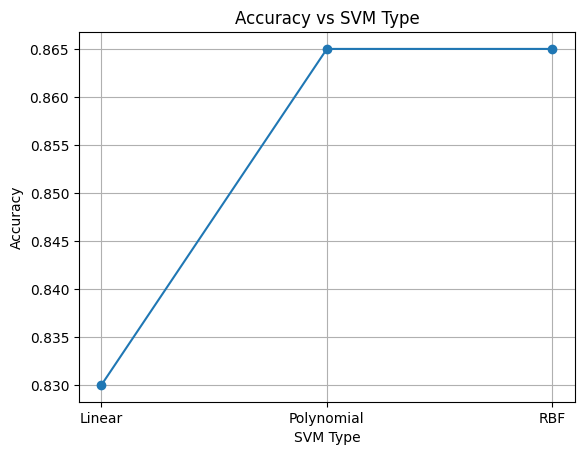

In [83]:
svm_tpes = ['Linear', 'Polynomial', 'RBF']
plt.plot(svm_tpes, svm_accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs SVM Type')
plt.xlabel('SVM Type')
plt.ylabel('Accuracy')
plt.xticks(svm_tpes)
plt.grid(True)
plt.show()